# Package Installation

In [ ]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset, concatenate_datasets, load_from_disk, load_metric, Dataset, ClassLabel
import numpy as np
import pandas as pd

In [ ]:
! pip install -U "neptune[tensorflow-keras]" tensorflow

In [ ]:
# Install add-on packages
! pip install tensorflow_addons

# Load dataset

In [ ]:
# Load the parquet dataset
dataset = load_dataset("parquet", data_files={'train': '/content/drive/MyDrive/Dissertation/Data/train_df.parquet',
                                             'test': '/content/drive/MyDrive/Dissertation/Data/test_df.parquet'})
train_df = dataset['train']
test_df = dataset['test']

In [ ]:
train_df = dataset['train']
test_df = dataset['test']

In [ ]:
# Length of unique labels
labels = len(set(train_df['label_cat']))

# Word Vectorization

## Count Vectorizer (BOW)

Adapted from Kim (2018)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Split x and y variable of each dataset
x_test = test_df['processed_text']
y_test = test_df['label_cat']
x_train = train_df['processed_text']
y_train = train_df['label_cat']

In [ ]:
# Number of total unique words (features) inthe the dataset
def count_unique(sample_list):
  total_words = []
  for i in sample_list:
    total_words.append(i.split(' '))
  return total_words
total_sentences = x_train + x_test
total_words = count_unique(total_sentences)

In [ ]:
#ref: https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-4-count-vectorizer-b3f4944e51b5
def count_unique(word_list):
  unique_word = []
  for i in range(len(word_list)):
    word = word_list[i]
    for y in word:
      if y not in unique_word:
        unique_word.append(y)
    i+=1
  return unique_word
unique_list = count_unique(total_words)

In [ ]:
from sklearn.metrics import f1_score
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = f1_score(y_test, y_pred,average= 'weighted')
    return accuracy

In [ ]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(100,len(unique_list),10)
def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, ngram_range=(1,1), classifier=lr):
    result = []
    for n in n_features:
        vectorizer.set_params(max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [ ]:
sample_score_1gram = nfeature_accuracy_checker(ngram_range=(1, 1))
sample_score_2gram = nfeature_accuracy_checker(ngram_range=(1, 2))
sample_score_3gram = nfeature_accuracy_checker(ngram_range=(1, 3))

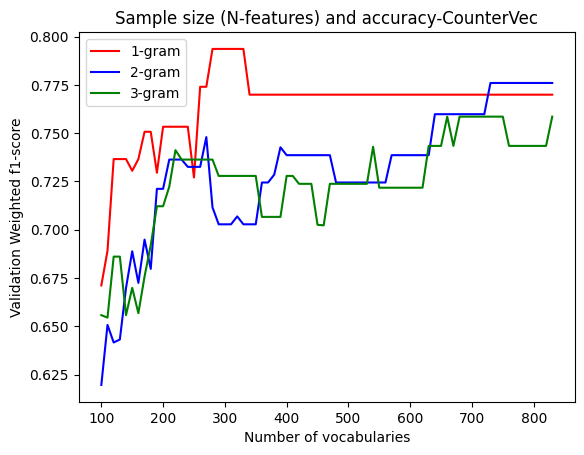

'\nIt is deduced that 1-gram achieved the best validation accuracy at 0.79 with a sample size of 300 samples\n'

In [ ]:
# Visulisation of accuracy and samples size (n_features)
def plot(list_sample):
  sample_size_plot = []
  sample_accuracy_plot = []
  for i in list_sample:
    sample_size_plot.append(i[0])
    sample_accuracy_plot.append(i[1])
  return sample_size_plot, sample_accuracy_plot
#import packages
import matplotlib.pyplot as plt
x_1gram, y_1gram = plot(sample_score_1gram)
x_2gram, y_2gram = plot(sample_score_2gram)
x_3gram, y_3gram = plot(sample_score_3gram)
plt.plot(x_1gram,y_1gram,color='r',label='1-gram')
plt.plot(x_2gram,y_2gram,color='b',label='2-gram')
plt.plot(x_3gram,y_3gram,color='g',label='3-gram')
plt.title('Sample size (N-features) and accuracy-CounterVec')
plt.xlabel('Number of vocabularies')
plt.ylabel('Validation Weighted f1-score')
plt.legend()
plt.show()
'''
It is deduced that 1-gram achieved the best validation accuracy at 0.79 with a sample size of 300 samples
'''

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tidf_vec = TfidfVectorizer()
sample_score_tidf_1gram = nfeature_accuracy_checker(vectorizer = tidf_vec , ngram_range=(1, 1))
sample_score_tidf_2gram = nfeature_accuracy_checker(vectorizer = tidf_vec , ngram_range=(1, 2))
sample_score_tidf_3gram = nfeature_accuracy_checker(vectorizer = tidf_vec , ngram_range=(1, 3))

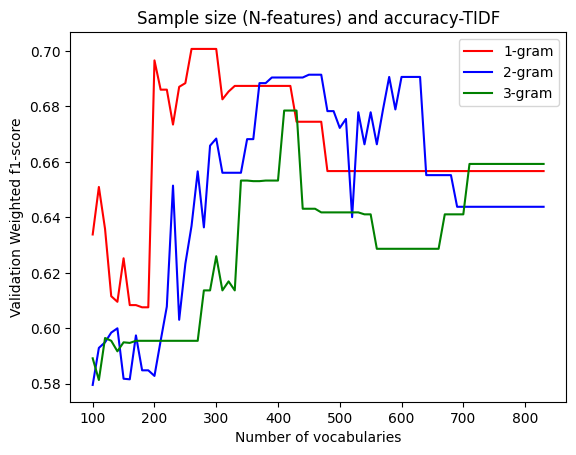

In [ ]:
# Visualisation
x_1gram, y_1gram = plot(sample_score_tidf_1gram)
x_2gram, y_2gram = plot(sample_score_tidf_2gram)
x_3gram, y_3gram = plot(sample_score_tidf_3gram )
plt.plot(x_1gram,y_1gram,color='r',label='1-gram')
plt.plot(x_2gram,y_2gram,color='b',label='2-gram')
plt.plot(x_3gram,y_3gram,color='g',label='3-gram')
plt.title('Sample size (N-features) and accuracy-TIDF')
plt.xlabel('Number of vocabularies')
plt.ylabel('Validation Weighted f1-score')
plt.legend()
plt.show()
#it is shown that 1-gram still outperforms bi-gram or tri-gram with a highest accuracy of 0.7

## Validate against other algorithms
Adapted from Kim (2018)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel
names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB",
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
count_vec = CountVectorizer()
n_features = np.arange(100,len(unique_list),10)
def classifier_comparator(vectorizer=tvec, n_features=n_features, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    for x in n_features:
      vectorizer.set_params(max_features=x, ngram_range=ngram_range)
      for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
          ])
        clf_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,clf_accuracy))
    return result


In [ ]:
# Comparative result with other classification method-TVec
result_tvec_1gram = classifier_comparator()
result_tvec_2gram = classifier_comparator(ngram_range=(1, 2))
result_tvec_3gram = classifier_comparator(ngram_range=(1, 3))

In [ ]:
# Comparative result with classification method-CountVector
result_countvec = classifier_comparator(vectorizer=count_vec)
result_countvec_2gram = classifier_comparator(vectorizer=count_vec, ngram_range=(1, 2))
result_countvec_3gram = classifier_comparator(vectorizer=count_vec, ngram_range=(1, 3))

In [ ]:
result_countvec

[('Logistic Regression', 0.6711732711732712),
 ('Linear SVC', 0.6937229437229437),
 ('LinearSVC with L1-based feature selection', 0.6906926406926407),
 ('Multinomial NB', 0.6069624819624818),
 ('Bernoulli NB', 0.498936735778841),
 ('Ridge Classifier', 0.6537373737373736),
 ('AdaBoost', 0.05627705627705628),
 ('Perceptron', 0.628558696205755),
 ('Passive-Aggresive', 0.6616541353383458),
 ('Nearest Centroid', 0.6731233907704496)]

In [ ]:
# Extract the classifier of the highest score in each of the N-gram
def max_score(result_list):
  score = []
  for i in range(len(result_list)):
    score.append(result_list[i][1])
    i+=1
  max_score_idx = score.index(max(score))
  maximum_classifier = result_list[max_score_idx][0]
  max_score = result_list[max_score_idx][1]
  return maximum_classifier , max_score

In [ ]:
# Summarise into a table
classifer_comparison = pd.DataFrame(columns = ['Vectorizer','Classifier','F1-score'])
classifer_comparison = classifer_comparison.append({'Vectorizer': 'CountVec-1gram','Classifier':max_score(result_countvec)[0],
                                                    'F1-score':max_score(result_countvec)[1]},ignore_index=True)
classifer_comparison = classifer_comparison.append({'Vectorizer': 'CountVec-2gram','Classifier':max_score(result_countvec_2gram)[0],
                                                    'F1-score':max_score(result_countvec_2gram)[1]},ignore_index=True)
classifer_comparison = classifer_comparison.append({'Vectorizer': 'CountVec-3gram','Classifier':max_score(result_countvec_3gram)[0],
                                                    'F1-score':max_score(result_countvec_3gram)[1]},ignore_index=True)
classifer_comparison = classifer_comparison.append({'Vectorizer': 'TD-IDF-1gram','Classifier':max_score(result_tvec_1gram)[0],
                                                    'F1-score':max_score(result_tvec_1gram)[1]},ignore_index=True)
classifer_comparison = classifer_comparison.append({'Vectorizer': 'TD-IDF-2gram','Classifier':max_score(result_tvec_2gram)[0],
                                                    'F1-score':max_score(result_tvec_2gram)[1]},ignore_index=True)
classifer_comparison = classifer_comparison.append({'Vectorizer': 'TD-IDF-3gram','Classifier':max_score(result_tvec_3gram)[0],
                                                    'F1-score':max_score(result_tvec_3gram)[1]},ignore_index=True)

In [ ]:
classifer_comparison

,Vectorizer,Classifier,F1-score
0,CountVec-1gram,Linear SVC,0.693723
1,CountVec-2gram,Linear SVC,0.688167
2,CountVec-3gram,LinearSVC with L1-based feature selection,0.715945
3,TD-IDF-1gram,Linear SVC,0.719158
4,TD-IDF-2gram,Linear SVC,0.689865
5,TD-IDF-3gram,Linear SVC,0.712231


import numpy as np
from google.colab import autoviz
df_6075133695035512171 = autoviz.get_registered_df('df_6075133695035512171')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6075133695035512171, *['F1-score'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4405023079361834709 = autoviz.get_registered_df('df_4405023079361834709')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4405023079361834709, *['F1-score'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5307397229749836345 = autoviz.get_registered_df('df_5307397229749836345')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5307397229749836345, *['Vectorizer'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3292285151157631326 = autoviz.get_registered_df('df_3292285151157631326')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3292285151157631326, *['Classifier'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8643112224282288350 = autoviz.get_registered_df('df_8643112224282288350')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_8643112224282288350, *['Vectorizer', 'Classifier'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4921277777963776685 = autoviz.get_registered_df('df_4921277777963776685')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_4921277777963776685, *['F1-score', 'Vectorizer'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7651024664875799790 = autoviz.get_registered_df('df_7651024664875799790')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7651024664875799790, *['F1-score', 'Classifier'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7644729092003916642 = autoviz.get_registered_df('df_7644729092003916642')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7644729092003916642, *['F1-score'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5157446636230332055 = autoviz.get_registered_df('df_5157446636230332055')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5157446636230332055, *['F1-score'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5176166367040670135 = autoviz.get_registered_df('df_5176166367040670135')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5176166367040670135, *['Vectorizer'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3187465800735330385 = autoviz.get_registered_df('df_3187465800735330385')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3187465800735330385, *['Classifier'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2217813828307119218 = autoviz.get_registered_df('df_2217813828307119218')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2217813828307119218, *['Vectorizer', 'Classifier'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5565661474215932093 = autoviz.get_registered_df('df_5565661474215932093')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5565661474215932093, *['F1-score', 'Vectorizer'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1000357936695569302 = autoviz.get_registered_df('df_1000357936695569302')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1000357936695569302, *['F1-score', 'Classifier'], **{'inner': 'stick'})
chart

## Doc2Vec
Adapted from Li (2018)

In [ ]:
! pip install gensim

In [ ]:
# Import packages
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn import utils
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tag sentences
train_df_pd = train_df.to_pandas()
test_df_pd = test_df.to_pandas()
train_tagged = train_df_pd.apply(
    lambda r:TaggedDocument(words=word_tokenize(r['processed_text']), tags=str(r['label_cat'])), axis=1)
test_tagged = test_df_pd.apply(
    lambda r:TaggedDocument(words=word_tokenize(r['processed_text']), tags=str(r['label_cat'])), axis=1)

### DBOW

In [ ]:
# Build vocabulary
model_dbow = Doc2Vec(dm=0, vector_size=len(unique_list), negative=5, hs=0, min_count=2, sample = 3)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 261/261 [00:00<00:00, 875770.68it/s]


In [ ]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 261/261 [00:00<00:00, 1069056.00it/s]


In [ ]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [ ]:
# Train using logistic regression before
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [ ]:
# Compute f1-score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
DBOW_f1_score = f1_score(y_test, y_pred, average='weighted')

### DM

In [ ]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=len(unique_list), negative=5, min_count=2,
                    alpha=0.01, min_alpha=0.0001,epochs=6)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 261/261 [00:00<00:00, 364661.34it/s]


In [ ]:
y_train, X_train = vec_for_learning(model_dmm , train_tagged)
y_test, X_test = vec_for_learning(model_dmm , test_tagged)
# Compute f1-score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
DM_f1_score = f1_score(y_test, y_pred, average='weighted')

In [ ]:
DM_f1_score

0.2840909090909091

In [ ]:
# Append to the classifier comparison table
classifer_comparison = classifer_comparison.append({'Vectorizer': 'Doc2Vec','Classifier':'DBOW',
                                                    'F1-score':DBOW_f1_score},ignore_index=True)
classifer_comparison = classifer_comparison.append({'Vectorizer': 'Doc2Vec','Classifier':'DM',
                                                    'F1-score':DM_f1_score},ignore_index=True)

<ipython-input-95-f80b5a552953>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifer_comparison = classifer_comparison.append({'Vectorizer': 'Doc2Vec','Classifier':'DBOW',
<ipython-input-95-f80b5a552953>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifer_comparison = classifer_comparison.append({'Vectorizer': 'Doc2Vec','Classifier':'DM',


## Vectoriser f1-score comparison

In [ ]:
classifer_comparison

,Vectorizer,Classifier,F1-score
0,CountVec-1gram,Linear SVC,0.693723
1,CountVec-2gram,Linear SVC,0.688167
2,CountVec-3gram,LinearSVC with L1-based feature selection,0.715945
3,TD-IDF-1gram,Linear SVC,0.719158
4,TD-IDF-2gram,Linear SVC,0.689865
5,TD-IDF-3gram,Linear SVC,0.712231
6,Doc2Vec,DBOW,0.277512
7,Doc2Vec,DM,0.277512


In [ ]:
# Save to a csv file
classifer_comparison.to_csv('/content/Classifier_comparison.csv', index=False)

# Deep learning methods

## CNN

In [ ]:
# Import modules
import tensorflow as tf
from tensorflow import keras

In [ ]:
# Use countervectorizer
cvec = CountVectorizer()
cvec.set_params(max_features=300, ngram_range=(1,1))

CountVectorizer(max_features=300)

In [ ]:
# Define batch size and train&validation steps based on size of training data
batch_size = 8
train_steps = int(len(train_df)/batch_size)
val_steps = int(len(test_df)/batch_size)

In [ ]:
# Set input-dimension
input_dim = len(unique_list) # Number of unique

In [ ]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=input_dim, output_dim=64, mask_zero=True),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [ ]:
# Model Summary
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          53568     
                                                                 
 conv1d (Conv1D)             (None, None, 64)          20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          20544     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                2

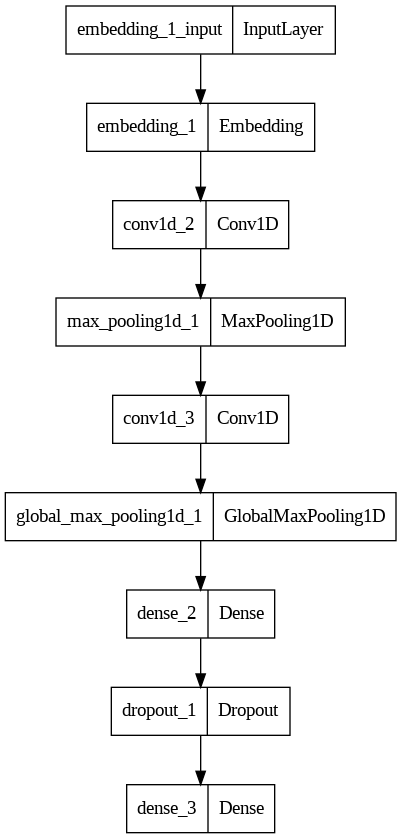

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_cnn)

In [ ]:
# Encoding
encoded_x_train = cvec.fit_transform(x_train).toarray()
encoded_x_test = cvec.fit_transform(x_test).toarray()

In [ ]:
# Applying TF-IDF
vectorizer = TfidfVectorizer(ngram_range = (3,3))
tf_x_train = vectorizer.fit_transform(x_train)
tf_x_test = vectorizer.fit_transform(x_test)
tf_x_train_score = tf_x_train.toarray()
tf_x_test_score = tf_x_test.toarray()

In [ ]:
# converting list to array
'''
These lines are only useful when values in y_train and y_test are string,
y_train = [eval(i) for i in y_train],
y_test = [eval(i) for i in y_test]
'''
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Log to neptune
import neptune
run = neptune.init_run(
    custom_run_id="CNN",
    project="Removed for Security purpose",
    api_token="Removed for Security purpose",
)

https://app.neptune.ai/dducl/Dissertation-Deeplearning/e/DEEPLEARN-2


In [ ]:
from tensorflow.keras import metrics

In [ ]:
# compile the model
import tensorflow_addons as tfa
model_cnn.compile(optimizer='adam', loss='CategoricalCrossentropy',
                          metrics = ['Precision'])

In [ ]:
# Train the first CNN model
#from neptune.integrations.tensorflow_keras import NeptuneCallback
#neptune_cbk = NeptuneCallback(run=run)
history_cnn = model_cnn.fit(encoded_x_train,
                    y_train,
                    epochs=25,
                    shuffle = True,
                    steps_per_epoch=train_steps,
                    callbacks=[neptune_cbk]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(9, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 2s 23ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 2/25
32/32 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 3/25
32/32 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - precision: 0.9583
Epoch 4/25
32/32 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 5/25
32/32 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 6/25
32/32 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 7/25
32/32 [==============================] - 1s 21ms/step - loss: 0.0000e+00 - precision: 0.9479
Epoch 8/25
32/32 [==============================] - 1s 22ms/step - loss: 0.0000e+00 - precision: 0.9688
Epoch 9/25
32/32 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 10/25
32/32 [==============================] - 1s 37ms/step - loss: 0

32/32 [==============================] - 1s 28ms/step - loss: 0.0000e+00 - precision: 0.9630


In [ ]:
# TF-IDF
history_cnn = model_cnn.fit(tf_x_train_score,
                    y_train,
                    epochs=25,
                    shuffle = True,
                    steps_per_epoch=train_steps)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(9, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 4s 81ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 2/25
32/32 [==============================] - 3s 81ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 3/25
32/32 [==============================] - 3s 81ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 4/25
32/32 [==============================] - 4s 139ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 5/25
32/32 [==============================] - 3s 101ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 6/25
32/32 [==============================] - 3s 79ms/step - loss: 0.0000e+00 - precision: 0.9514
Epoch 7/25
32/32 [==============================] - 3s 80ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 8/25
32/32 [==============================] - 3s 90ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 9/25
32/32 [==============================] - 7s 224ms/step - loss: 0.0000e+00 - precision: 0.9688
Epoch 10/25
32/32 [==============================] - 6s 199ms/step - los

32/32 [==============================] - 2s 71ms/step - loss: 0.0000e+00 - precision: 0.9788


In [ ]:
# stop logging
run.stop()

Shutting down background jobs, please wait a moment...
Done!
All 0 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/dducl/Dissertation-Deeplearning/e/DEEPLEARN-2/metadata


In [ ]:
# Evaluate the model
loss, accuracy = model_cnn.evaluate(encoded_x_test, y_test,steps=val_steps)
#print('Accuracy: %f' % (accuracy*100))

1/8 [==>...........................] - ETA: 1s - loss: 0.0000e+00 - precision: 0.8889

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - precision: 0.9545


In [ ]:
# Evaluate the f1-score for CVEC
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred_prob = model_cnn.predict(encoded_x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
# Print f1-score
print(f1_score(y_test, y_pred , average="weighted"))

3/3 [==============================] - 0s 13ms/step
0.003952569169960475


In [ ]:
# Evaluate the f1-score for TF-IDF (Needs to re-run the corresponding TF-IDF)
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred_prob = model_cnn.predict(tf_x_test_score)
y_pred = np.argmax(y_pred_prob, axis=1)
# Print f1-score
print(f1_score(y_test, y_pred , average="weighted"))

3/3 [==============================] - 0s 23ms/step
0.003952569169960475


In [ ]:
# Save model
model_cnn.save('/content/drive/MyDrive/Dissertation/Deep_Learning/model_cnn.keras')

## CNN+ LSTM

In [ ]:
vocab_size = len(unique_list)
embedding_vector_length = 64
input_length = 300 # This is equal to the n_feature of count-vectorisation

In [ ]:
# Same fixture but an LSTM layer is added after the maxpooling layer
model_cnn_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_vector_length, input_length=input_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='softmax')
])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 300, 64)           53568     
                                                                 
 conv1d_16 (Conv1D)          (None, 296, 64)           20544     
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 148, 64)           0         
 ng1D)                                                           
                                                                 
 lstm_17 (LSTM)              (None, 100)               66000     
                                                                 
 dense_22 (Dense)            (None, 32)                3232      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                     

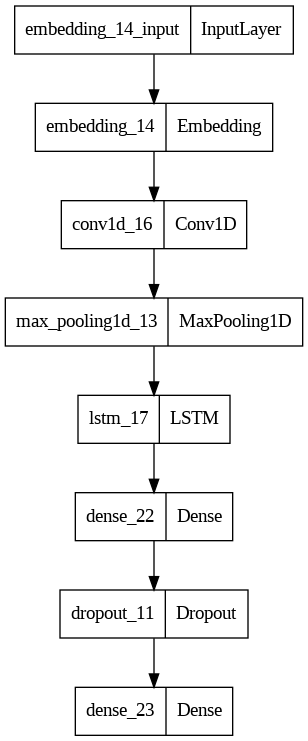

In [ ]:
#Show model
print(model_cnn_lstm.summary())
plot_model(model_cnn_lstm)

In [ ]:
# compile the model
model_cnn_lstm.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['Precision'])

In [ ]:
# Train the first CNN model
#from neptune.integrations.tensorflow_keras import NeptuneCallback
'''
run_lstm = neptune.init_run(
    custom_run_id="CNN_LSTM",
    project="dducl/Dissertation-Deeplearning",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZmViNmNiNy1hYmFiLTRhOWYtYjA3NC02NDRhYjJmZjUxODcifQ==",
)
neptune_cbk = NeptuneCallback(run=run_lstm)
'''
history_lstm = model_cnn_lstm.fit(encoded_x_train,
                    y_train,
                    epochs=25,
                    shuffle = True,
                    steps_per_epoch=train_steps,
                    callbacks=[neptune_cbk]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(9, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 11s 151ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 2/25
32/32 [==============================] - 4s 122ms/step - loss: 0.0000e+00 - precision: 0.9549
Epoch 3/25
32/32 [==============================] - 6s 179ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 4/25
32/32 [==============================] - 7s 230ms/step - loss: 0.0000e+00 - precision: 0.9722
Epoch 5/25
32/32 [==============================] - 4s 138ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 6/25
32/32 [==============================] - 3s 102ms/step - loss: 0.0000e+00 - precision: 0.9479
Epoch 7/25
32/32 [==============================] - 4s 138ms/step - loss: 0.0000e+00 - precision: 0.9688
Epoch 8/25
32/32 [==============================] - 4s 124ms/step - loss: 0.0000e+00 - precision: 0.9583
Epoch 9/25
32/32 [==============================] - 3s 101ms/step - loss: 0.0000e+00 - precision: 0.9583
Epoch 10/25
32/32 [==============================] - 3s 102ms/ste

32/32 [==============================] - 2s 66ms/step - loss: 0.0000e+00 - precision: 0.9577


In [ ]:
# Stop run
run_lstm.stop()

Shutting down background jobs, please wait a moment...
Done!
All 0 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/dducl/Dissertation-Deeplearning/e/DEEPLEARN-3/metadata


In [ ]:
# Evaluate the model
loss, precision = model_cnn_lstm.evaluate(encoded_x_test, y_test,steps=val_steps)
print('Precision: %f' % (precision*100))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 1s 21ms/step - loss: 0.0000e+00 - precision: 0.9545
Precision: 95.454544


In [ ]:
# Evaluate the f1-score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred_prob = model_cnn_lstm.predict(encoded_x_test )
y_pred = np.argmax(y_pred_prob, axis=1)
# Print f1-score
print(f1_score(y_test, y_pred , average="weighted"))

3/3 [==============================] - 1s 34ms/step
0.003952569169960475


In [ ]:
# Save model
model_cnn_lstm.save('/content/drive/MyDrive/Dissertation/Deep_Learning/model_cnn_lstm.keras')

## CNN-Bidirectional LSTM

In [ ]:
# Same fixture but an LSTM layer is added after the maxpooling layer
model_cnn_Bilstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_vector_length, input_length=input_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [ ]:
# Compile model
model_cnn_Bilstm.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['Precision'])

# Train model

run_Bilstm = neptune.init_run(
    custom_run_id="CNN_BiLSTM",
    project="dducl/Dissertation-Deeplearning",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2ZmViNmNiNy1hYmFiLTRhOWYtYjA3NC02NDRhYjJmZjUxODcifQ==",
)
neptune_cbk = NeptuneCallback(run=run_Bilstm)

history_BiLSTM = model_cnn_Bilstm.fit(encoded_x_train,
                    y_train,
                    epochs=25,
                    shuffle = True,
                    steps_per_epoch=train_steps,
                    callbacks=[neptune_cbk]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(9, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 13s 175ms/step - loss: 0.0000e+00 - precision: 0.9583
Epoch 2/25
32/32 [==============================] - 7s 230ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 3/25
32/32 [==============================] - 7s 217ms/step - loss: 0.0000e+00 - precision: 0.9618
Epoch 4/25
32/32 [==============================] - 6s 177ms/step - loss: 0.0000e+00 - precision: 0.9722
Epoch 5/25
32/32 [==============================] - 6s 178ms/step - loss: 0.0000e+00 - precision: 0.9549
Epoch 6/25
32/32 [==============================] - 4s 134ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 7/25
32/32 [==============================] - 4s 120ms/step - loss: 0.0000e+00 - precision: 0.9583
Epoch 8/25
32/32 [==============================] - 9s 291ms/step - loss: 0.0000e+00 - precision: 0.9653
Epoch 9/25
32/32 [==============================] - 8s 234ms/step - loss: 0.0000e+00 - precision: 0.9583
Epoch 10/25
32/32 [==============================] - 5s 169ms/ste

32/32 [==============================] - 3s 77ms/step - loss: 0.0000e+00 - precision: 0.9577


In [ ]:
# Stop run
run_Bilstm.stop()

Shutting down background jobs, please wait a moment...
Done!
All 0 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/dducl/Dissertation-Deeplearning/e/DEEPLEARN-4/metadata


In [ ]:
# Evaluate the model
loss, precision = model_cnn_Bilstm.evaluate(encoded_x_test, y_test,steps=val_steps)
print('Precision: %f' % (precision*100))

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


8/8 [==============================] - 1s 27ms/step - loss: 0.0000e+00 - precision: 0.9545
Precision: 95.454544


In [ ]:
# Evaluate the f1-score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred_prob = model_cnn_Bilstm.predict(encoded_x_test )
y_pred = np.argmax(y_pred_prob, axis=1)
# Print f1-score
print(f1_score(y_test, y_pred , average="weighted"))

3/3 [==============================] - 0s 127ms/step
0.003952569169960475


In [ ]:
# Save model
model_cnn_Bilstm.save('/content/drive/MyDrive/Dissertation/Deep_Learning/model_cnn_Bilstm.keras')

# Visualisation

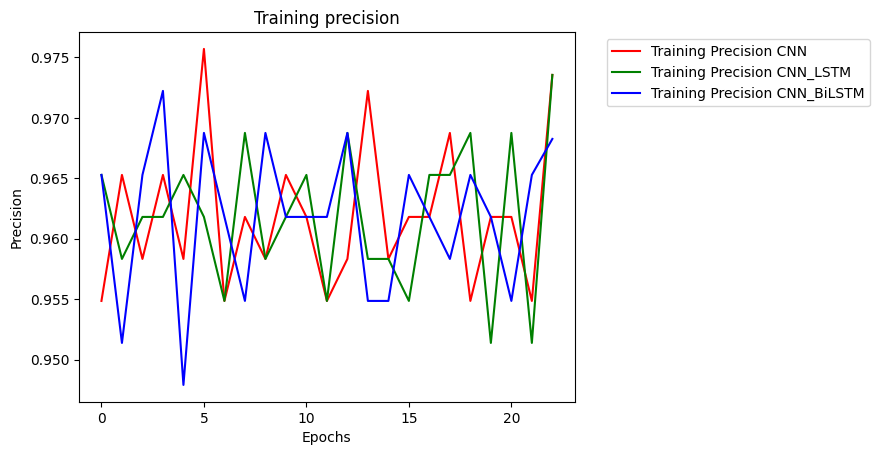

In [ ]:
from matplotlib import pyplot as plt
def plot_precision(history):
  model_history = history.history
  acc = model_history['precision']
  epochs = history.epoch
  return acc, epochs

cnn_acc,cnn_epochs = plot_precision(history_cnn)
cnn_lstm_acc, cnn_lstm_epochs = plot_precision(history_lstm)
cnn_bilstm_acc, cnn_bilstm_epochs = plot_precision(history_BiLSTM)
plt.plot(cnn_epochs, cnn_acc, 'r', label='Training Precision CNN')
plt.plot(cnn_lstm_epochs, cnn_lstm_acc, 'g', label='Training Precision CNN_LSTM')
plt.plot(cnn_bilstm_epochs, cnn_bilstm_acc, 'b', label='Training Precision CNN_BiLSTM')
plt.title('Training precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()